In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import csv

# reformat data (change semi-colons to commas)
reader = csv.reader(open('./winequality-red.csv', "r"), delimiter=';')
writer = csv.writer(open('./winequality-red-reformatted.csv', 'w'), delimiter=',')
writer.writerows(reader)

# read reformatted data using Pandas
Data = pd.read_csv('./winequality-red-reformatted.csv')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# create an array 'target' & populate it with False if element in quality 
# column is less than or equal to quality's median value; else populte with True
target = [0 if q <= np.median(Data.quality) else 1 for q in Data.quality]

# create a Pandas series from 'target' array
Data["target"] = pd.Series(target)


# The frquency of ones in the target column is much lower than the frequency of
# zeros, so it might be a good idea to oversample the training data

# create instances of minmaxscaler & logistic regression
scaler = MinMaxScaler()
reg = LogisticRegression()

# drop columns & scale data
X = Data.drop(columns = ['target', 'quality'])
X = scaler.fit_transform(X)
y = Data.target

# split the data into training and testing set with the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

# oversample the training data
sm = SMOTE(random_state = 20)
X_resamp, y_resamp = sm.fit_resample(X_train, y_train)


# rescale data
scaler.fit(X_resamp, y_resamp)

MinMaxScaler()

### Second Model Build Using KNN

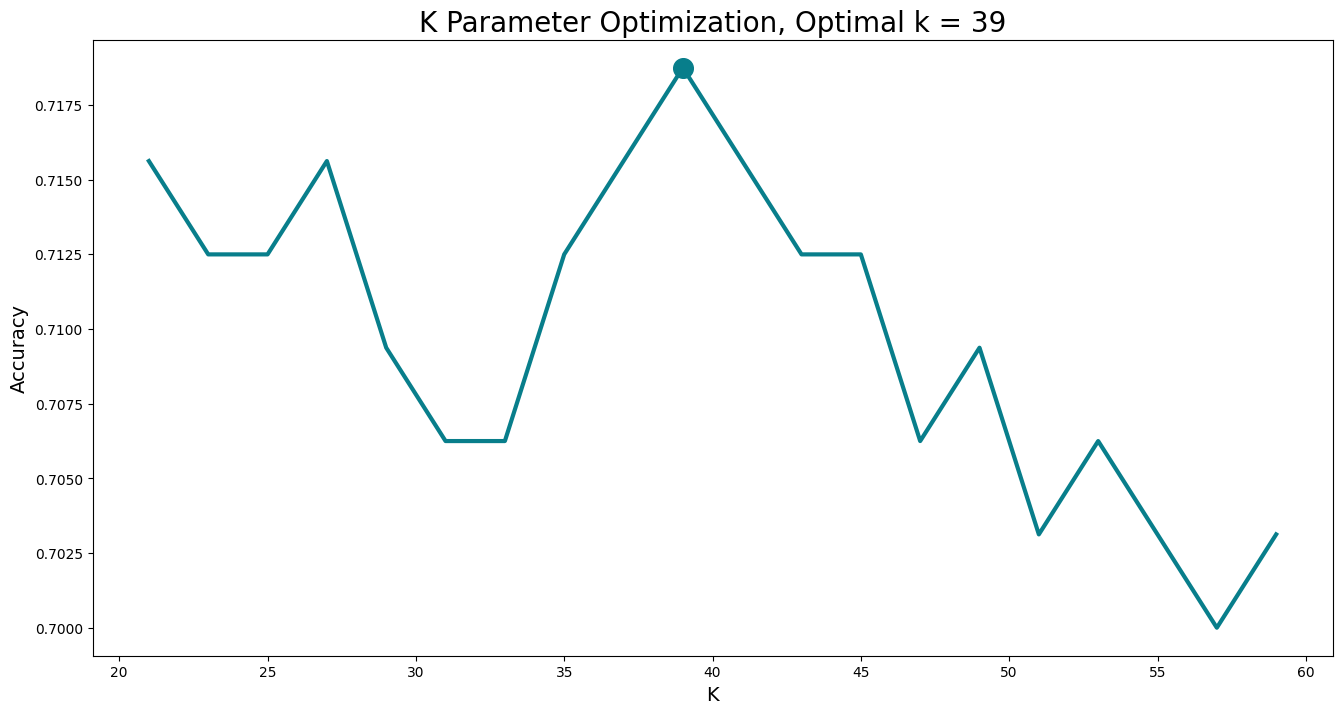

In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import math

#print(math.sqrt(len(y_test)))
from sklearn.metrics import accuracy_score
evals = []

for k in range(21, 61, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_resamp, y_resamp)
    yhat_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, yhat_test)
    evals.append({'k': k, 'accuracy': accuracy})

evals = pd.DataFrame(evals)
best_k = evals.sort_values(by='accuracy', ascending=False).iloc[0]

plt.figure(figsize=(16, 8))
plt.plot(evals['k'], evals['accuracy'], lw=3, c='#087E8B')
plt.scatter(best_k['k'], best_k['accuracy'], s=200, c='#087E8B')
plt.title(f"K Parameter Optimization, Optimal k = {int(best_k['k'])}", size=20)
plt.xlabel('K', size=14)
plt.ylabel('Accuracy', size=14)
plt.show()

knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_resamp, y_resamp)
yhat_test = knn.predict(X_test)
yhat_train = knn.predict(X_resamp)

### Report for Model 2

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

MSE_test = mean_squared_error(y_test, yhat_test)
MSE_train = mean_squared_error(y_resamp, yhat_train)
print("MSE for testing data set is:", MSE_test)
print("MSE for training data set is:", MSE_train)

# classification report
print("Training:\n",classification_report(y_resamp, yhat_train))
print("Testing:\n",classification_report(y_test, yhat_test))

MSE for testing data set is: 0.28125
MSE for training data set is: 0.15388086642599277
Training:
               precision    recall  f1-score   support

           0       0.95      0.73      0.83      1108
           1       0.78      0.96      0.86      1108

    accuracy                           0.85      2216
   macro avg       0.87      0.85      0.84      2216
weighted avg       0.87      0.85      0.84      2216

Testing:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81       274
           1       0.31      0.76      0.44        46

    accuracy                           0.72       320
   macro avg       0.63      0.74      0.62       320
weighted avg       0.85      0.72      0.76       320

